In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
data = pd.read_csv('/content/Retail Sales Analysis_utf.csv' , encoding = 'unicode_escape') # to avoid encoding error , use 'unicode_escape'
data.head()

,ï»¿transactions_id,sale_date,sale_time,customer_id,gender,age,category,quantiy,price_per_unit,cogs,total_sale
0,180,2022-11-05,10:47:00,117,Male,41.0,Clothing,3.0,300.0,129.0,900.0
1,522,2022-07-09,11:00:00,52,Male,46.0,Beauty,3.0,500.0,145.0,1500.0
2,559,2022-12-12,10:48:00,5,Female,40.0,Clothing,4.0,300.0,84.0,1200.0
3,1180,2022-01-06,08:53:00,85,Male,41.0,Clothing,3.0,300.0,129.0,900.0
4,1522,2022-11-14,08:35:00,48,Male,46.0,Beauty,3.0,500.0,235.0,1500.0


In [55]:
data.shape #(rows , columns)

(2000, 11)

In [56]:
data.info() # give details about all columns i.e  is there null values , data-types, column heading
# here last 4 column contains null values as there are 1997 data where as it should be 2000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ï»¿transactions_id  2000 non-null   int64  
 1   sale_date           2000 non-null   object 
 2   sale_time           2000 non-null   object 
 3   customer_id         2000 non-null   int64  
 4   gender              2000 non-null   object 
 5   age                 1990 non-null   float64
 6   category            2000 non-null   object 
 7   quantiy             1997 non-null   float64
 8   price_per_unit      1997 non-null   float64
 9   cogs                1997 non-null   float64
 10  total_sale          1997 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 172.0+ KB


In [57]:
data.drop(['sale_time'] , axis = 1 , inplace = True) #Drop - delete the null columns
#Axis =1  means  that full columns
#inplace = true  means save the drop line code

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ï»¿transactions_id  2000 non-null   int64  
 1   sale_date           2000 non-null   object 
 2   customer_id         2000 non-null   int64  
 3   gender              2000 non-null   object 
 4   age                 1990 non-null   float64
 5   category            2000 non-null   object 
 6   quantiy             1997 non-null   float64
 7   price_per_unit      1997 non-null   float64
 8   cogs                1997 non-null   float64
 9   total_sale          1997 non-null   float64
dtypes: float64(5), int64(2), object(3)
memory usage: 156.4+ KB


In [59]:
pd.isnull(data) # is null value is there then true otherwise false

,ï»¿transactions_id,sale_date,customer_id,gender,age,category,quantiy,price_per_unit,cogs,total_sale
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,False,False,False


In [60]:
pd.isnull(data).sum() # give sum of null values in columns

,0
ï»¿transactions_id,0
sale_date,0
customer_id,0
gender,0
age,10
category,0
quantiy,3
price_per_unit,3
cogs,3
total_sale,3


In [61]:
data.shape

(2000, 10)

In [62]:
data.dropna(inplace =True) # Delete null values in the row

In [63]:
data.shape #there  difference b/w both shape o/p as the rows with null values are deleted

(1987, 10)

In [64]:
data['total_sale'] =  data['total_sale'].astype('int') # Change the data-type i.e from float to integer

In [65]:
data['total_sale'].dtypes

dtype('int64')

In [66]:
data.columns

Index(['ï»¿transactions_id', 'sale_date', 'customer_id', 'gender', 'age',
       'category', 'quantiy', 'price_per_unit', 'cogs', 'total_sale'],
      dtype='object')

In [67]:
data.rename(columns = {'sale_date' : 'date_sold'})
#rename the columns

,ï»¿transactions_id,date_sold,customer_id,gender,age,category,quantiy,price_per_unit,cogs,total_sale
0,180,2022-11-05,117,Male,41.0,Clothing,3.0,300.0,129.0,900
1,522,2022-07-09,52,Male,46.0,Beauty,3.0,500.0,145.0,1500
2,559,2022-12-12,5,Female,40.0,Clothing,4.0,300.0,84.0,1200
3,1180,2022-01-06,85,Male,41.0,Clothing,3.0,300.0,129.0,900
4,1522,2022-11-14,48,Male,46.0,Beauty,3.0,500.0,235.0,1500
...,...,...,...,...,...,...,...,...,...,...
1995,1857,2022-11-09,109,Male,60.0,Electronics,2.0,25.0,7.5,50
1996,211,2022-09-12,54,Male,42.0,Beauty,3.0,500.0,235.0,1500
1997,650,2023-10-08,98,Male,55.0,Electronics,1.0,30.0,15.0,30
1998,1211,2023-11-22,82,Male,42.0,Beauty,3.0,500.0,235.0,1500


In [68]:
data.describe()
#print all the numeric values in datasets (i.e count , mean , std ,etc)

,ï»¿transactions_id,customer_id,age,quantiy,price_per_unit,cogs,total_sale
count,1987.000000,1987.000000,1987.000000,1987.00000,1987.000000,1987.000000,1987.000000
mean,1000.513337,66.284852,41.351283,2.51384,179.924509,95.081933,457.086059
std,578.274413,44.964430,13.662653,1.13277,189.441178,122.032280,560.862242
min,1.000000,1.000000,18.000000,1.00000,25.000000,6.250000,25.000000
25%,499.500000,24.000000,29.000000,1.00000,30.000000,13.000000,60.000000
50%,1001.000000,69.000000,42.000000,3.00000,50.000000,27.500000,150.000000
75%,1502.500000,102.000000,53.000000,4.00000,300.000000,147.000000,900.000000
max,2000.000000,155.000000,64.000000,4.00000,500.000000,620.000000,2000.000000


In [69]:
data[['quantiy' , 'price_per_unit' , 'cogs' , 'total_sale']].describe()
#this for getting values for the specific colums

,quantiy,price_per_unit,cogs,total_sale
count,1987.00000,1987.000000,1987.000000,1987.000000
mean,2.51384,179.924509,95.081933,457.086059
std,1.13277,189.441178,122.032280,560.862242
min,1.00000,25.000000,6.250000,25.000000
25%,1.00000,30.000000,13.000000,60.000000
50%,3.00000,50.000000,27.500000,150.000000
75%,4.00000,300.000000,147.000000,900.000000
max,4.00000,500.000000,620.000000,2000.000000


In [70]:
#Exploratory Data Analysis

#Gender


data.columns

Index(['ï»¿transactions_id', 'sale_date', 'customer_id', 'gender', 'age',
       'category', 'quantiy', 'price_per_unit', 'cogs', 'total_sale'],
      dtype='object')

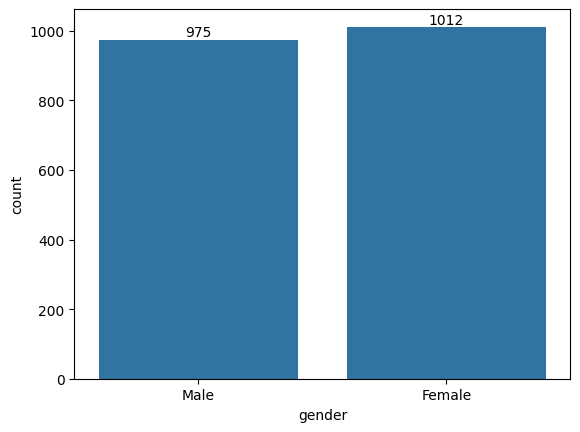

In [71]:
ax = sns.countplot(x= 'gender' , data = data)

for bars in ax.containers:
  ax.bar_label(bars)
#It gives  the  number of males and females with numbers and visuals . We can
#see the difference in both the visual

In [72]:
data.groupby(['gender'] , as_index =False)['total_sale'].sum().sort_values(by = 'total_sale' , ascending = False)
#groupby - means  group up the columns on given condition i.e here it is gender  it group all males in one and female as other group
#as_index - this gives  index to the columns which means if the value is True then gender will be treated as index and  if its false  then there will numbering from 0 ....
#['toatal_sale] - every gender will get group by total_sale bases
#sum() - total_sale is getting summed i.e what is total_sale for male and female
#sort_values - it sort the values accorrding to requirement as need in ascending  or desending order

,gender,total_sale
0,Female,463110
1,Male,445120


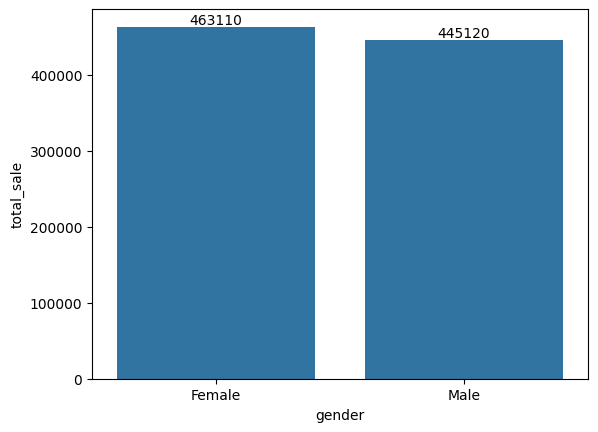

In [73]:
sales =data.groupby(['gender'] , as_index =False)['total_sale'].sum().sort_values(by = 'total_sale' , ascending = False)
sale =sns.barplot(x ='gender' , y ='total_sale' , data = sales)

for bars in sale.containers:
  sale.bar_label(bars)

From above graph we can come to the conclusion that women purchase more as compare to the man.

In [74]:
# Create age groups
data['age_group'] = pd.cut(data['age'], bins=[17, 25, 35, 45, 55, 65], labels=['18–25', '26–35', '36–45', '46–55', '56–65'])




In [75]:
#Age Analysis
data.columns

Index(['ï»¿transactions_id', 'sale_date', 'customer_id', 'gender', 'age',
       'category', 'quantiy', 'price_per_unit', 'cogs', 'total_sale',
       'age_group'],
      dtype='object')

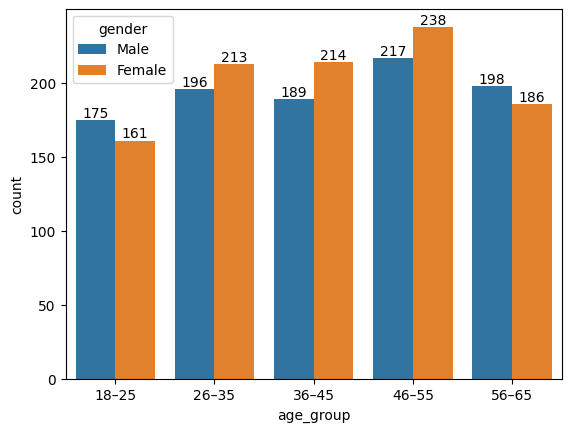

In [76]:
ay =sns.countplot(x='age_group' , data=data , hue ="gender")

for bars in ay.containers:
  ay.bar_label(bars)

  #Hue - catergorize it accorrding to the given condition ,i.e here age is get divide into male and female as per age group.

From this visuals we can conclude that most buyer are from Age Group 46- 55 that too Females

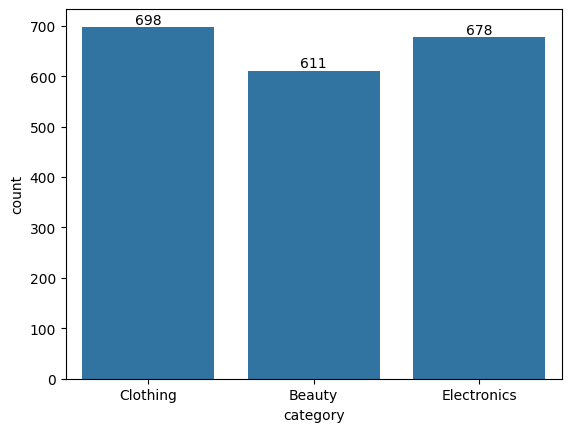

In [77]:
#For Category
# data.groupby(['category'] , as_index = False)['total_sale'].sum().sort_values(by = 'total_sale' , ascending = False)

cx =sns.countplot(x ='category' , data = data )

for bars in cx.containers:
  cx.bar_label(bars)

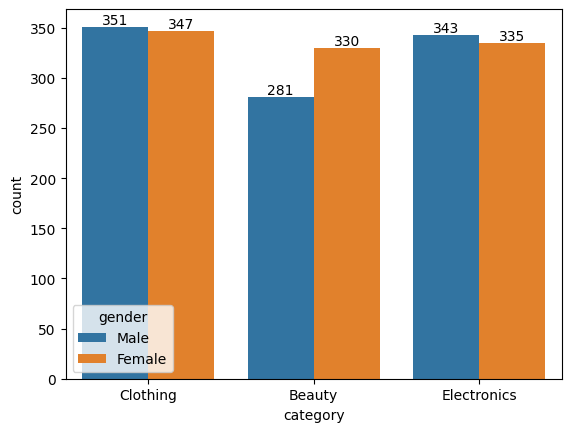

In [78]:
cx =sns.countplot(x ='category', data = data , hue = 'gender')
for bars in cx.containers:
  cx.bar_label(bars)

Here we have come to a conclusion that the TOTAL Sale for the female is more as compare to the males because of the there is margins of difference in the sales of beauty category .

In [79]:
data.columns

Index(['ï»¿transactions_id', 'sale_date', 'customer_id', 'gender', 'age',
       'category', 'quantiy', 'price_per_unit', 'cogs', 'total_sale',
       'age_group'],
      dtype='object')

In [80]:
data.groupby( 'age_group', as_index= False)['total_sale'].mean()

<ipython-input-80-1013662605>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby( 'age_group', as_index= False)['total_sale'].mean()


,age_group,total_sale
0,18–25,502.857143
1,26–35,481.344743
2,36–45,455.744417
3,46–55,440.230769
4,56–65,412.578125


In [81]:
average_order_value = data['total_sale'].mean()
print("Average Order Value:", average_order_value)


Average Order Value: 457.0860593860091


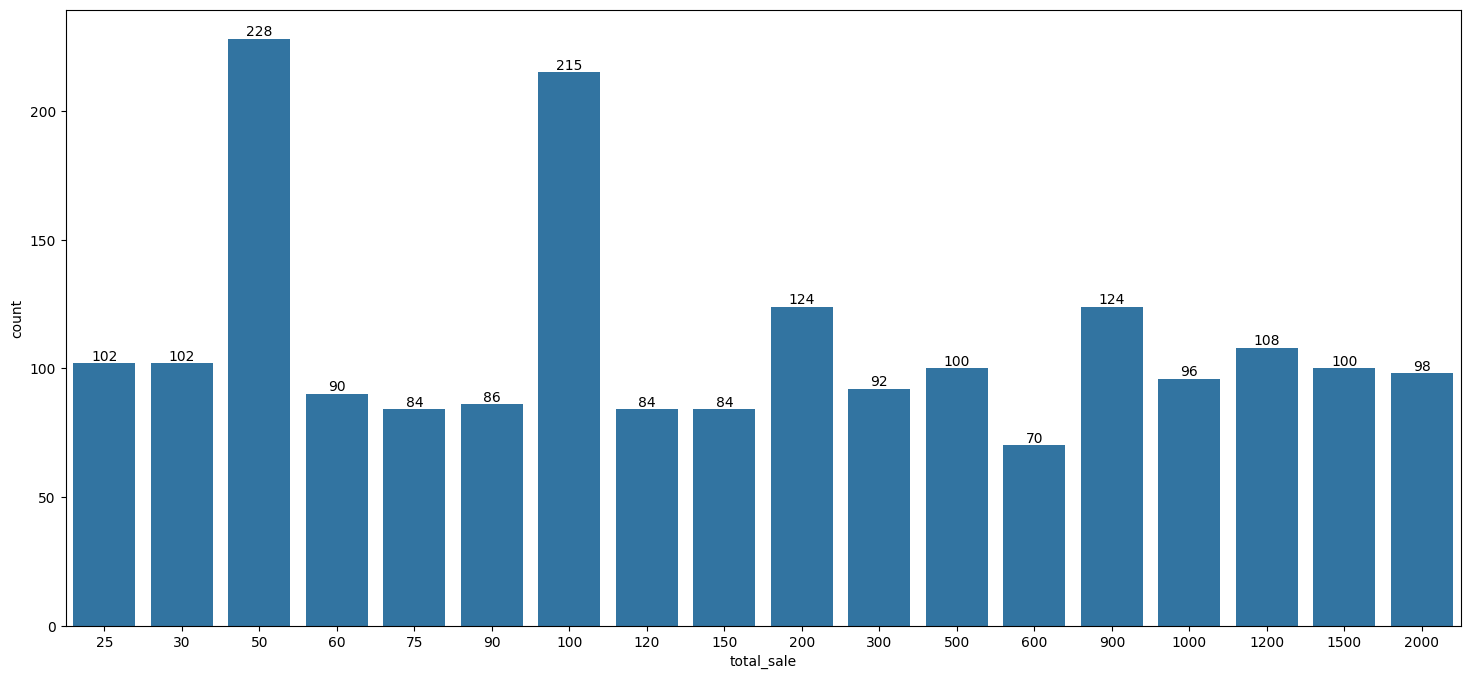

In [82]:
plt.figure(figsize = (18 , 8))
tx =sns.countplot(x = 'total_sale' , data = data )
for bars in tx.containers:
  tx.bar_label(bars)


# **Conclusion**


*   From this we have come to the  conclusion that there *more purchase is done by females* , in all category the sale is not much varies but in the beauty sector there in much difference.



*   If it is divide  into  *age-group wise* so the mostly purchase by the 46-55 age group of female.


*  The Average Order value is *around 457 rupees*. And the total sale according to *age-group wise is 503rs aaprox* for 18-25 age-group



